1. EDA: Do more expensive books have better reviews?
2. EDA: Do longer books have higher prices?
3. What are the best Python books? What are the best ML books?
4. Cluster analysis of book names / TF-IDF and K-means
5. Amazon review scraping & Book review summary

In [ ]:
# !pip install bert-extractive-summarizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from bs4 import BeautifulSoup
import requests
import re
from IPython.display import display, Markdown

In [144]:
df = pd.read_csv('final_book_dataset_kaggle2.csv')
df.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [14]:
df.describe()

,price,avg_reviews
count,722.000000,702.000000
mean,46.491537,4.472080
std,63.292394,0.409608
min,0.990000,1.000000
25%,23.725000,4.325000
50%,39.490000,4.500000
75%,51.990000,4.700000
max,1318.740000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [145]:
df['n_reviews'] = df['n_reviews'].str.replace(',','').astype(float)

In [146]:
df.loc[~df['pages'].str.isnumeric().fillna(False),'pages'] = np.NaN

In [147]:
df['pages'] = df['pages'].astype(float)

# Exporatory analyses on DS books


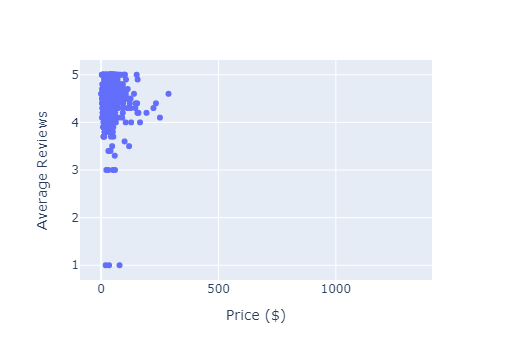

In [18]:
px.scatter(df, x = "price", y = "avg_reviews", labels= {'price':'Price ($)', 'avg_reviews':'Average Reviews'})

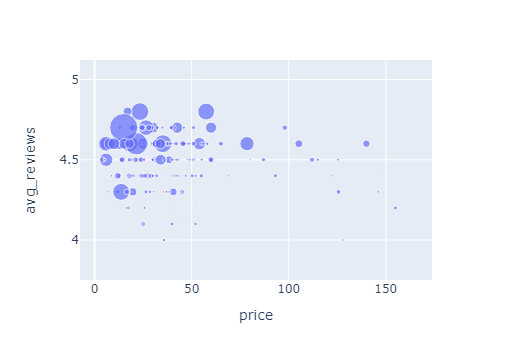

In [10]:
px.scatter(df.dropna(axis=0, how='any'), x="price", y="avg_reviews",size="n_reviews")

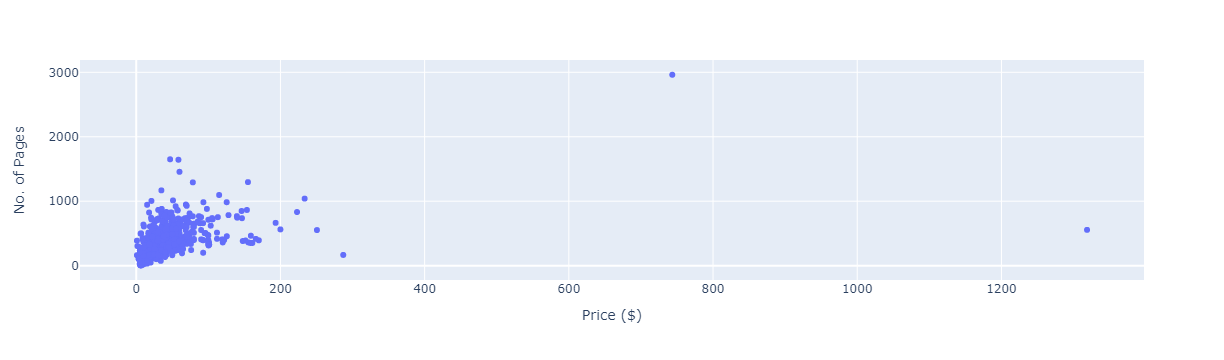

In [148]:
px.scatter(df, x = "price", y = "pages", labels= {'price':'Price ($)', 'pages':'No. of Pages'})

In [11]:
# Best Python books
python_books = df[df['title'].str.contains('Python')]
best_python_books = python_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_python_books

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
22,Monty Python and the Holy Grail (Special Edition),NaN,9.99,9.99,NaN,4.7,10103.0,85%,8%,3%,1%,2%,7.5 x 5.5 x 0.5 inches; 3.2 Ounces,NaN,"Unqualified, Japanese (Dolby Digital 2.0 Mono)...",NaN,NaN,/Monty-Python-Holy-Grail-Special/dp/B00005O3VC...,https://www.amazon.com/Monty-Python-Holy-Grail...
633,"Python Crash Course, 2nd Edition: A Hands-On, ...",[ Eric Matthes],23.99,23.99,544,4.7,7767.0,81%,13%,4%,1%,1%,NaN,NaN,"""Brilliant.""","No Starch Press; 2nd edition (May 21, 2019)",NaN,/Python-Crash-Course-Eric-Matthes-ebook/dp/B07...,https://www.amazon.com/Python-Crash-Course-Eri...
394,Python: - The Bible- 3 Manuscripts in 1 book: ...,NaN,27.97,27.97,375,4.3,4228.0,64%,16%,10%,4%,6%,6 x 0.85 x 9 inches,1.11 pounds,English,"Independently published (April 28, 2018)",978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
528,Monty Python's Life Of Brian - The Immaculate ...,NaN,9.48,9.48,NaN,4.8,3678.0,86%,9%,4%,1%,NaN,6.75 x 5 x 0.25 inches; 1.6 Ounces,NaN,NaN,NaN,NaN,/Monty-Pythons-Life-Brian-Immaculate/dp/B000VE...,https://www.amazon.com/Monty-Pythons-Life-Bria...
569,Monty Python's Life Of Brian [DVD],NaN,18.85,18.85,NaN,4.8,3678.0,86%,9%,4%,1%,NaN,7.5 x 5.38 x 0.6 inches; 4 Ounces,NaN,English (Dolby Digital 2.0 Mono),NaN,NaN,/Monty-Pythons-Brian-Graham-Chapman/dp/6305388...,https://www.amazon.com/Monty-Pythons-Brian-Gra...
582,Monty Python's The Meaning of Life [Blu-ray],NaN,9.99,9.99,NaN,4.7,3337.0,82%,10%,4%,2%,2%,6.75 x 5.3 x 0.35 inches; 2.4 Ounces,NaN,"English (DTS-HD Master Audio 5.1), French (DTS...",NaN,NaN,/Monty-Pythons-Meaning-Life-Blu-ray/dp/B07G24K...,https://www.amazon.com/Monty-Pythons-Meaning-L...
532,Python: For Beginners: A Crash Course Guide To...,[ Timothy C. Needham],13.66,13.66,135,4.3,3142.0,66%,16%,10%,3%,5%,6 x 0.31 x 9 inches,6.7 ounces,English,"Independently published (September 21, 2017)",66,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...


In [12]:
# Best ML books
ml_books = df[df['title'].str.contains('Machine Learning')]
best_ml_books = ml_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_ml_books

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
478,"Hands-On Machine Learning with Scikit-Learn, K...",[ Aurélien Géron],57.49,57.49,856,4.8,3129.0,85%,10%,3%,1%,2%,7 x 1.2 x 9.2 inches,2.8 pounds,English,"O'Reilly Media; 2nd edition (October 15, 2019)",978-1492032649,/Hands-Machine-Learning-Scikit-Learn-TensorFlo...,https://www.amazon.com/Hands-Machine-Learning-...
701,Machine Learning For Absolute Beginners: A Pla...,NaN,NaN,NaN,167,4.5,1123.0,68%,18%,8%,3%,2%,NaN,NaN,English,"Scatterplot Press; 2nd edition (June 21, 2017)",NaN,/Machine-Learning-Absolute-Beginners-Introduct...,https://www.amazon.com/Machine-Learning-Absolu...
717,The Hundred-Page Machine Learning Book,[ Andriy Burkov],31.99,26.50 - 31.99,160,4.6,839.0,80%,10%,4%,2%,3%,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,"Andriy Burkov (January 13, 2019)",978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
720,Pattern Recognition and Machine Learning (Info...,[ Christopher M. Bishop],105.22,90.99 - 105.22,738,4.6,687.0,76%,13%,6%,3%,2%,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,"Springer (August 17, 2006)",978-0387310732,/Pattern-Recognition-Learning-Information-Stat...,https://www.amazon.com/Pattern-Recognition-Lea...
678,Mathematics for Machine Learning,NaN,48.99,48.99,398,4.7,608.0,80%,13%,3%,2%,2%,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
591,Introduction to Machine Learning with Python: ...,NaN,49.35,29.76 - 49.35,398,4.5,591.0,75%,15%,3%,3%,5%,7 x 0.82 x 9.19 inches,1.3 pounds,English,"O'Reilly Media; 1st edition (November 15, 2016)",978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
51,Machine Learning: 4 Books in 1: The #1 Beginne...,"[ Andrew Park, and , Russell Newton]",NaN,NaN,NaN,4.7,290.0,83%,10%,3%,1%,3%,NaN,NaN,NaN,NaN,NaN,/Data-Science-Beginners-Programming-Learning/d...,https://www.amazon.com/Data-Science-Beginners-...


# Clustering book titles


In [10]:
# Clustering book titles
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))
# ngram_range: how many word to put together at a time (e.g: data science, machine learning...)
X = vectorizer.fit_transform(df['title'])

In [14]:
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

,001,01,01 2017,10,10 20gal,10 coding,10 data,10 essential,10 guide,10 minutes,...,zed shaw,zero,zero hero,zero just,zero pro,zipline,zipline python,zoo,zoo med,zoo reptile
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.cluster import KMeans

In [15]:
sum_of_squared_distances = []
# Kmeans  clustering
K = range(2,10)
for k in K:
    Km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    Km.fit(X)
    sum_of_squared_distances.append(Km.inertia_)

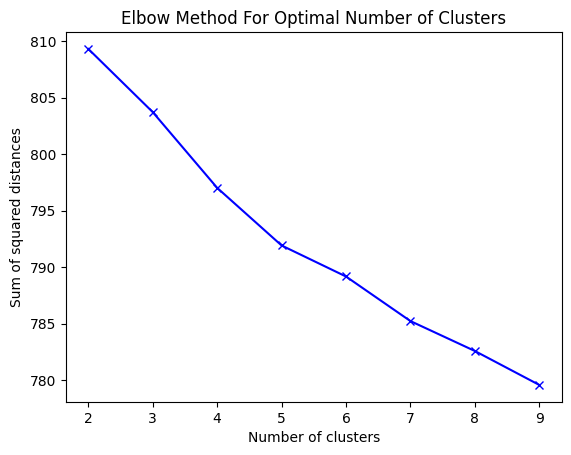

In [16]:
# Plotting for number of clusters

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [14]:
# Get clusters
true_k = 6
model = KMeans(n_clusters = true_k, max_iter = 600, n_init = 10, init = 'k-means++')
model.fit(X)

# Get prediction/labels
labels = model.labels_
book_c1 = pd.DataFrame(list(zip(df['title'],labels)), columns = ['title', 'cluster'])
print(book_c1.sort_values(by = ['cluster']))

                                                 title  cluster
0    Data Analysis Using R (Low Priced Edition): A ...        0
165  The Art of Data Analysis: How to Answer Almost...        0
167  Astronomical Image and Data Analysis (Astronom...        0
338  The Art of Data Analysis: Non-Technical Skills...        0
172                       Murach's R for Data Analysis        0
..                                                 ...      ...
798  Algorithms For Dummies (For Dummies (Computer/...        5
321  Data Structures & Algorithms in Python (Develo...        5
802  The Digital Mindset: What It Really Takes to T...        5
774  Algorithms and Data Structures for Massive Dat...        5
747  Grokking Algorithms: An Illustrated Guide for ...        5

[830 rows x 2 columns]


In [18]:
# Prediction on foreign data

test = vectorizer.transform(['machine learning'])
model.predict(test)[0]

1

In [24]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

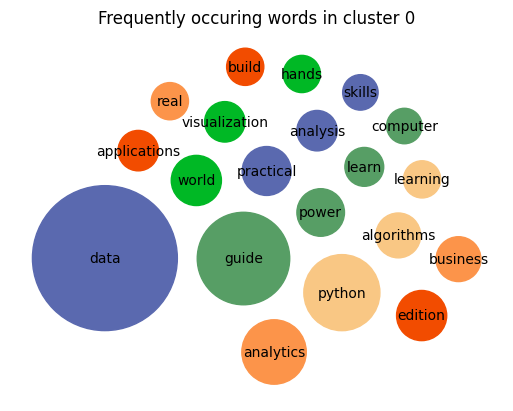

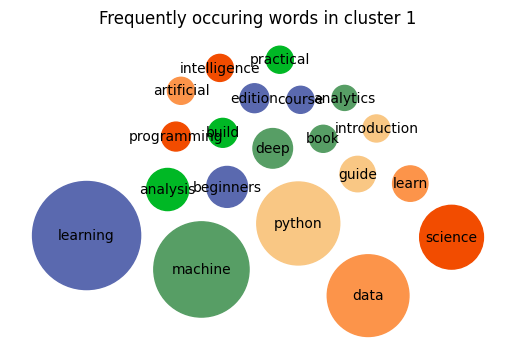

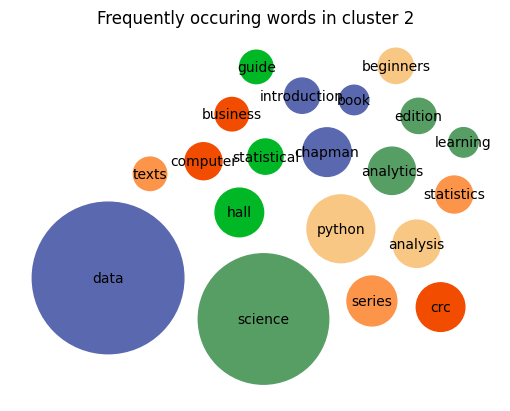

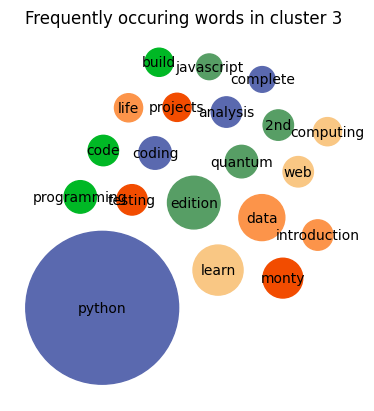

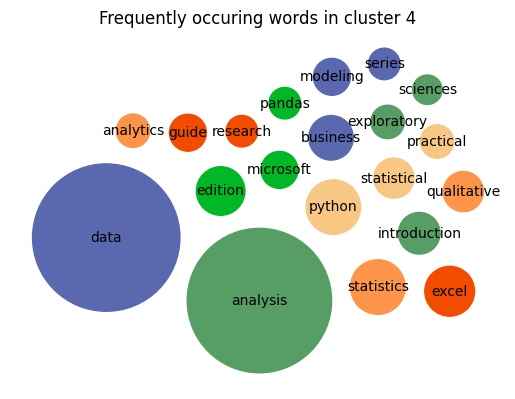

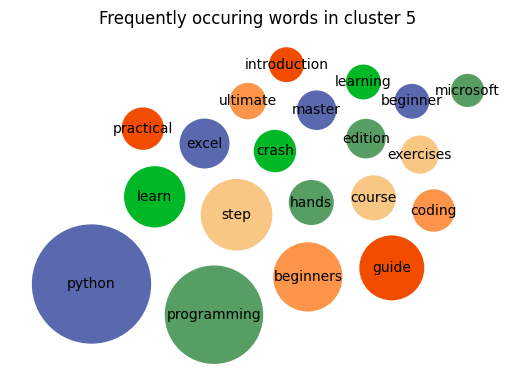

In [25]:
# Comments for main lines on the right ---->

for k in range(true_k):
    text = book_c1[book_c1.cluster == k]['title'].str.cat(sep = ' ')                                                 # creates a string for all words in all the titles of clusters one by one
    text = re.sub('\W+',' ', text ).lower() # remove special characters
    text = re.sub(r'\b\w{1,2}\b', '', text) # remove words having length less than 2
    text = re.sub("\s\s+" , " ", text) # remove redundant space
    text_tokens = word_tokenize(text)                                                                                # creates a list of all the words in 'text' 
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]                              # removes stopwords like 'am, he, was, here, how' etc.
    freq = Counter(tokens_without_sw)                                                                                # creates a dictionary of frequencies of all the words  
    area = pd.DataFrame.from_dict(freq, orient='index').reset_index()                                                # converts the dictionary to a dataframe
    area = area.rename(columns = {'index' : 'words', 0:'frequency'}).sort_values('frequency', ascending = False)     # rename columns and sort values by frequency (descending)
    area = area[0:20]                                                                                                # taking top 20 occuring words
    area['color'] = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825','#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825','#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825','#5A69AF', '#579E65']   # have to specify colors for bubble chart
    area = area.reset_index(drop = True)                                                                             # reset index and drops the index column
                                                                                                                     # creating visualization for top words
    bubble_chart = BubbleChart(area=area['frequency'],bubble_spacing=2)                                              # specifying areas for bubbles
    bubble_chart.collapse()                           
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))                                                          # creating plot
    bubble_chart.plot(ax, area['words'], area['color'])                                                              # specifying colors and text to be shown in bubbles
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    ax.set_title(f'Frequently occuring words in cluster {k}')
    plt.show()

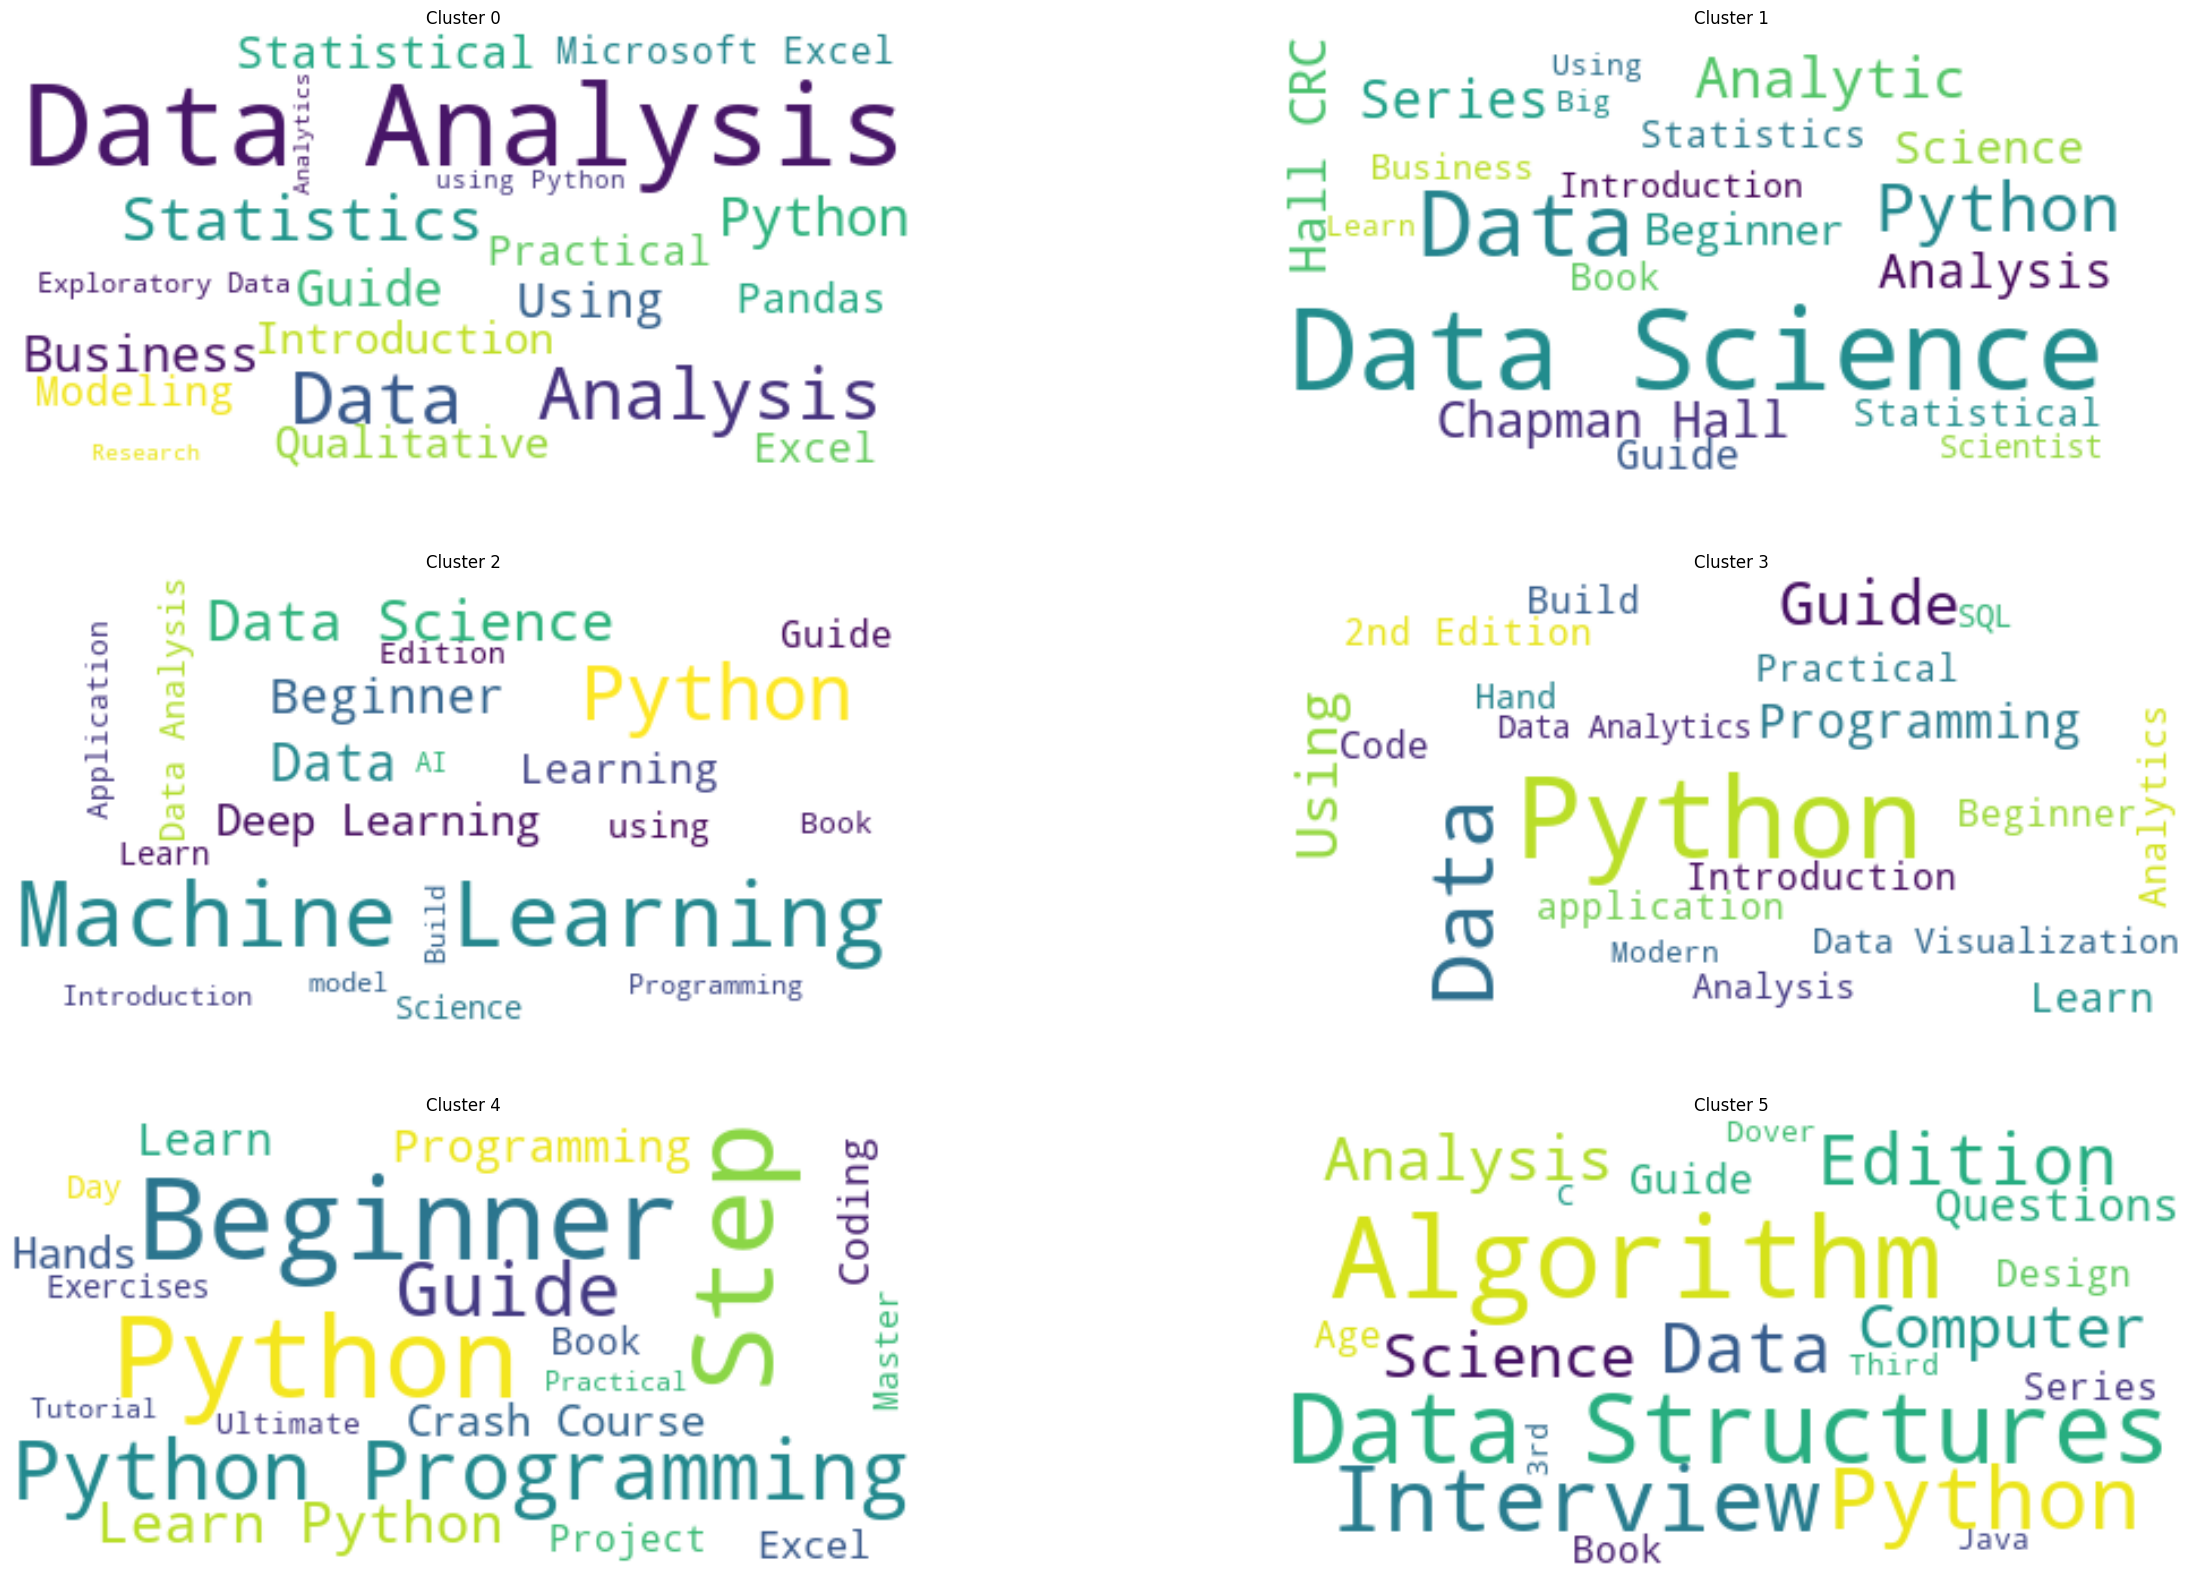

In [27]:
# Create wordclouds for clusters
from wordcloud import WordCloud

plt.figure(figsize=(30, 20))
for k in range(true_k):
   text = book_c1[book_c1.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(text)

   # Create subplot
    
   plt.subplot(3,2, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
plt.show()

In [20]:
from wordcloud import WordCloud, STOPWORDS

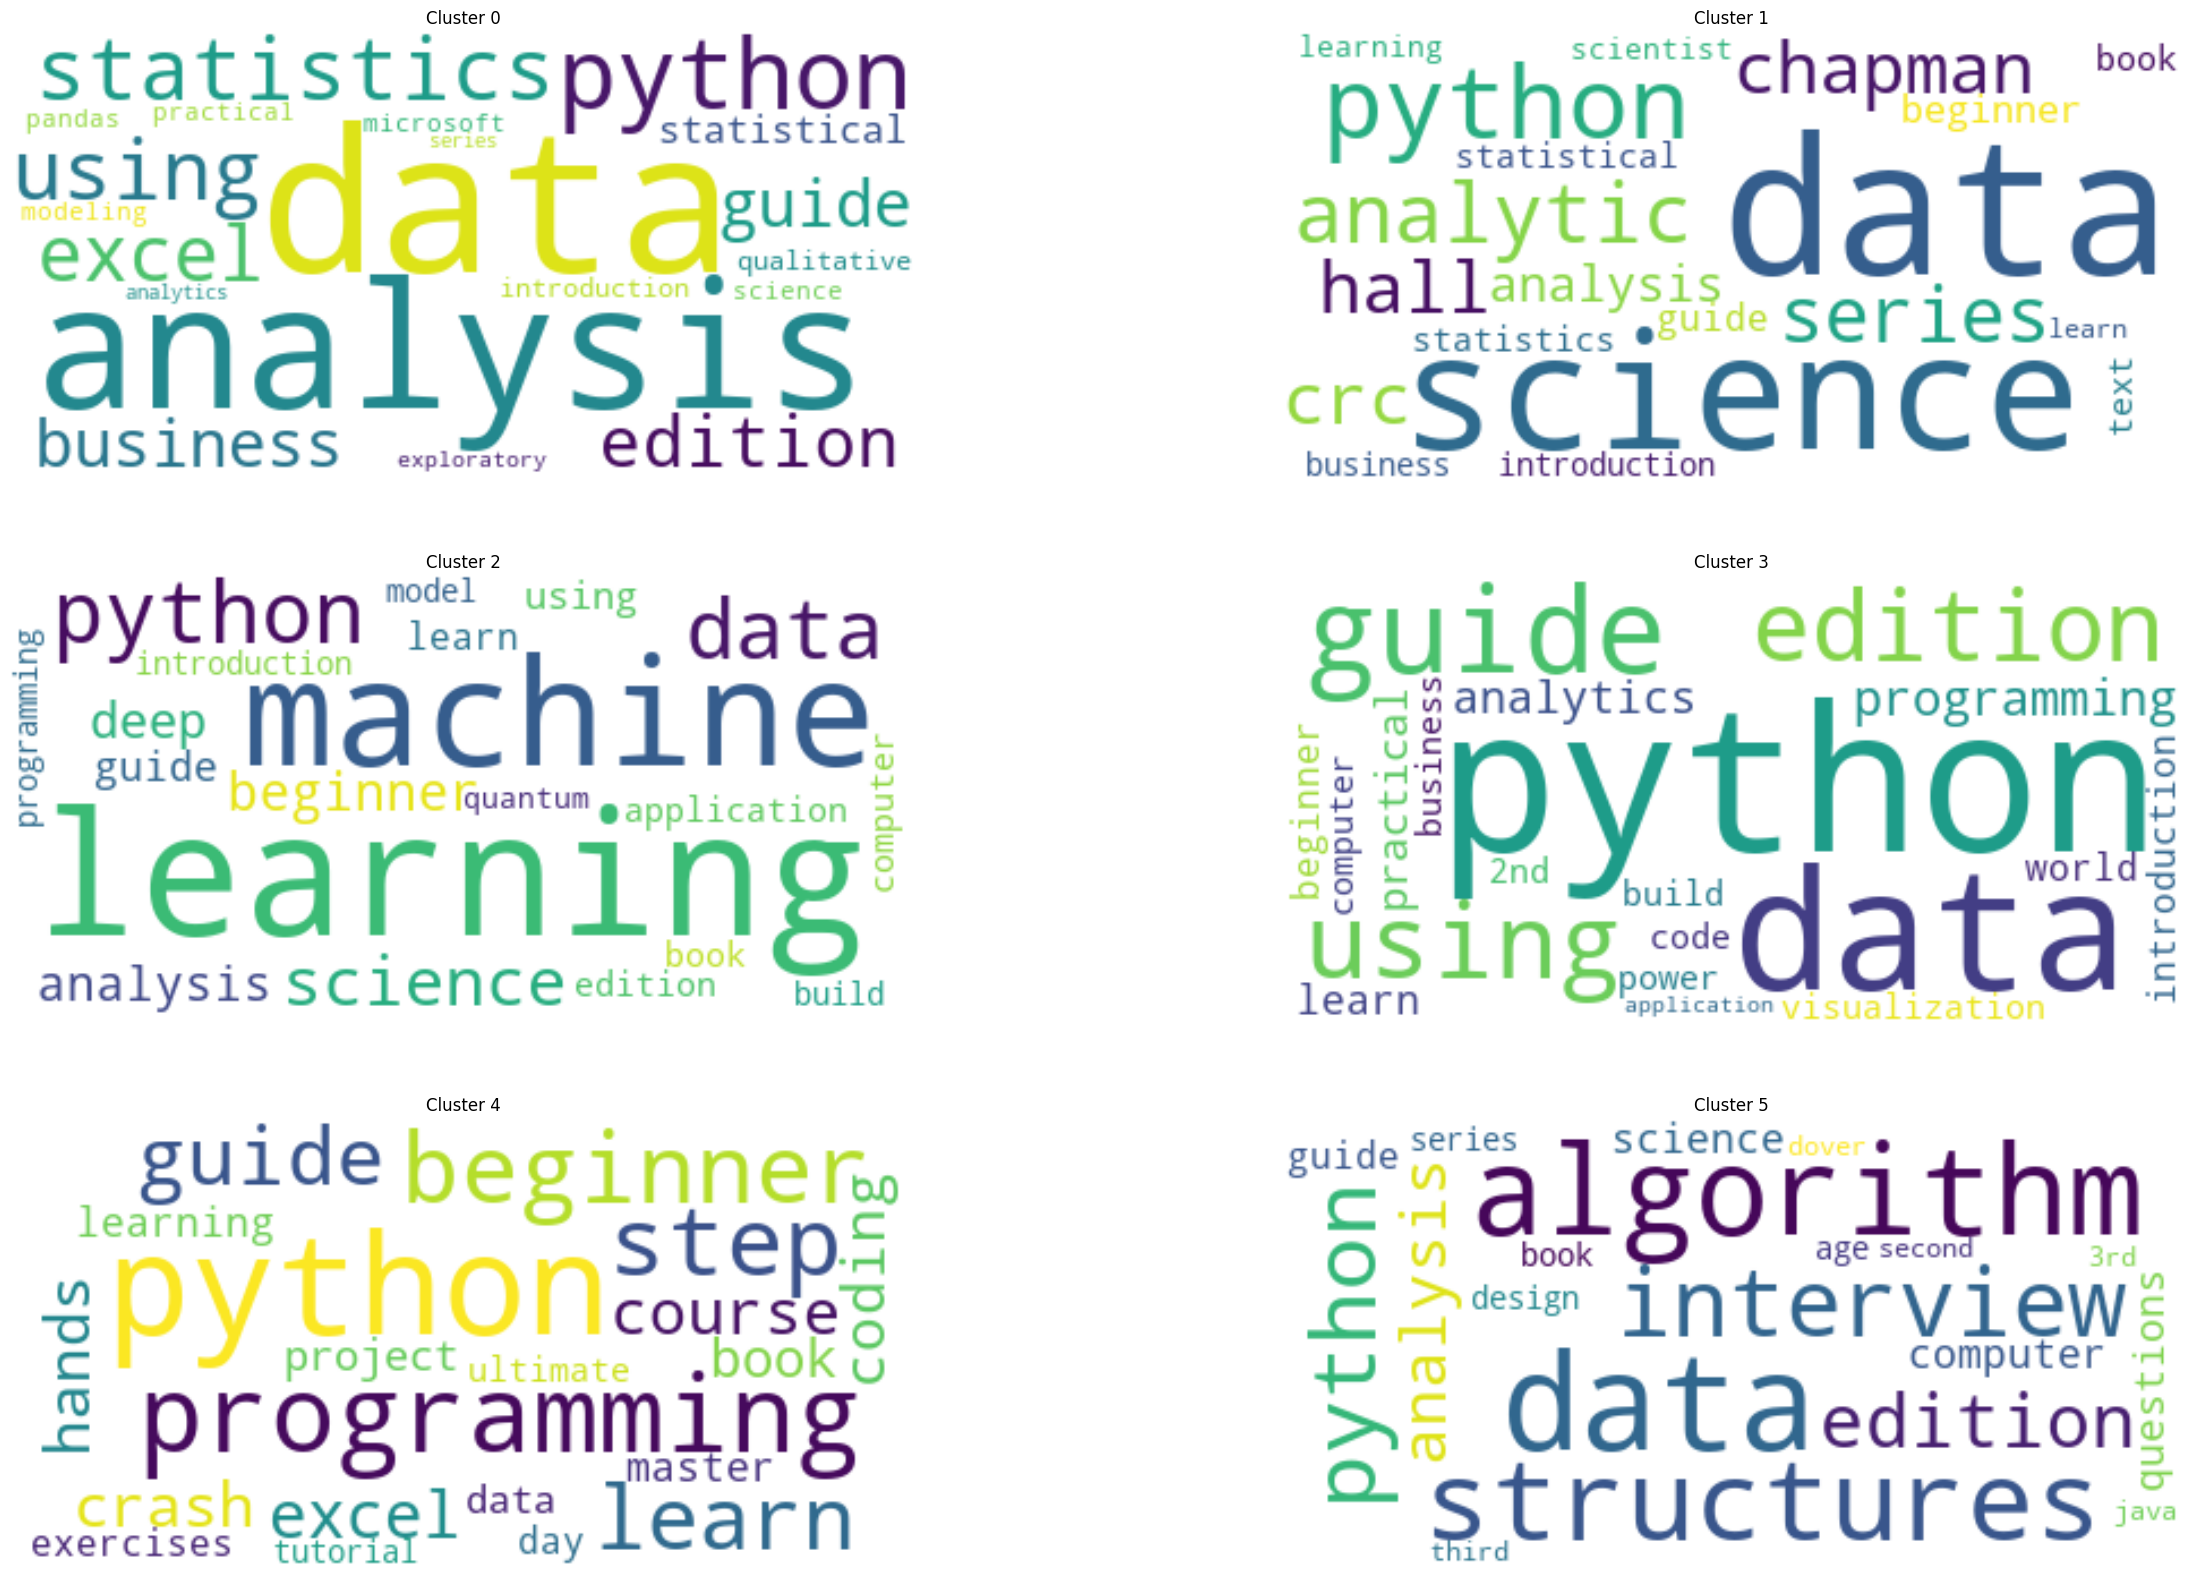

In [26]:
stopwords = set(STOPWORDS)
wordcloud =  WordCloud( background_color="white", stopwords = stopwords, max_words = 20,
                          colormap='viridis', collocations=False)
plt.figure(figsize=(30, 20))
for k in range(true_k):
    text = book_c1[book_c1.cluster == k]['title'].str.cat(sep = ' ')                                                 # creates a string for all words in all the titles of clusters one by one
    text = re.sub('\W+',' ', text ).lower() # remove special characters
    text = re.sub(r'\b\w{1,2}\b', '', text) # remove words having length less than 2
    text = re.sub("\s\s+" , " ", text) 
    wordcloud.generate(text)
    
    plt.subplot(3,2,k+1).set_title("Cluster " + str(k)) 
    plt.plot()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

plt.show()

# for k in range(true_k):
#    text = book_c1[book_c1.cluster == k]['title'].str.cat(sep=' ')
#    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

#    # Create subplot
#    plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
#    plt.plot()
#    plt.imshow(wordcloud, interpolation="bilinear")
#    plt.axis("off")
# plt.show()

# Scrape Amazon Book Reviews

In [43]:
df['complete_link'][0]

'https://www.amazon.com/Data-Analysis-Using-Low-Priced/dp/1685549594/ref=sr_1_16?keywords=data+analysis&qid=1671164640&sr=8-16'

Review link

https://www.amazon.com/Data-Analysis-Using-Low-Priced/product-reviews/1685549594/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [44]:
df['complete_link'][1]

'https://www.amazon.com/Head-First-Data-Analysis-statistics/dp/0596153937/ref=sr_1_15?keywords=data+analysis&qid=1671164640&sr=8-15'

review link:
    
https://www.amazon.com/Head-First-Data-Analysis-statistics/product-reviews/0596153937/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [4]:
# Using product urls available to get reviews page by formatting them
# Some urls have different structure. Ignoring them.

def get_review_url(product_url):
    try:
        split_url = product_url.split('/dp')
        review_url = split_url[0] + '/product-reviews/' + split_url[1].split('/')[1] + '/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    except:
        review_url = None
    return review_url

df['review_urls'] = df['complete_link'].apply(lambda x : get_review_url(x))


# Dataframe with books with review urls
df_reviews = df.loc[~(df['review_urls'].isnull())].reset_index()
df_reviews

,index,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,...,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,review_urls
0,0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23.0,55%,39%,...,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...,https://www.amazon.com/Data-Analysis-Using-Low...
1,1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124.0,61%,20%,...,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...,https://www.amazon.com/Head-First-Data-Analysi...
2,2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10.0,87%,13%,...,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,1686.0,75%,16%,...,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12.0,52%,17%,...,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,824,Data Science (The MIT Press Essential Knowledg...,NaN,9.69,9.69,280,4.5,404.0,67%,21%,...,3%,2%,5 x 0.57 x 6.9 inches,8.8 ounces,English,"The MIT Press; Illustrated edition (April 13, ...",99,/Data-Science-Press-Essential-Knowledge/dp/026...,https://www.amazon.com/Data-Science-Press-Esse...,https://www.amazon.com/Data-Science-Press-Esse...
681,825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208,4.5,74.0,72%,14%,...,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...,https://www.amazon.com/Deep-Learning-Engage-Wo...
682,826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573,4.5,93.0,78%,7%,...,4%,4%,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...,https://www.amazon.com/Machine-Learning-Financ...
683,828,Clinical Biostatistics and Epidemiology Made R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...,https://www.amazon.com/Clinical-Biostatistics-...


In [6]:
base_site = df['review_urls'][0]
base_site

'https://www.amazon.com/Data-Analysis-Using-Low-Priced/product-reviews/1685549594/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [7]:
headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}
response = requests.get(base_site,headers=headers)


In [8]:
response.status_code

200

In [9]:
html = response.content
html[:100]

b'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start '

In [10]:
soup = BeautifulSoup(markup=html, features="lxml")

In [11]:
with open('book_example.html', 'wb') as file: 
    file.write(soup.prettify('utf-8'))


In [37]:

divs = soup.find_all("div", {"class": "a-section a-spacing-none review-views celwidget"})

In [39]:
divs[0].text

"\n\n\n\n\n\n\n\n\nFrom the United States\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n    \n    \n    \n    \n    \n        There are 0 reviews and 0 ratings from the United States\n    \nFrom other countriesSandip2.0 out of 5 stars\nNot a book, just a notebook. Don't get fooled.\nReviewed in India 🇮🇳 on March 12, 2023Verified Purchase\nNot a good book to learn Data Science. It's just a notebook of the author which he introduced in the market in printed form. Just  a business trick to earn some quick money. It's clear from the absence of any name of the publisher. No proper explanation on any topic. Couldn't learn R too. Refer to other book for Data Science.\n\n\nReport\nPriyanka Patel5.0 out of 5 stars\nEasy to understand\nReviewed in India 🇮🇳 on September 30, 2021Verified Purchase\nThis is one of the best book I have ever found. The book is written in a very fluent way and very easy to understand. Thank you so much Dhaval Sir.\n\nOne person found this helpful\nReport\nAmaz

In [40]:
divs[0].find("div", {'class':"a-row a-spacing-small review-data"})

<div class="a-row a-spacing-small review-data"><span class="a-size-base review-text review-text-content" data-hook="review-body">
<span>Not a good book to learn Data Science. It's just a notebook of the author which he introduced in the market in printed form. Just  a business trick to earn some quick money. It's clear from the absence of any name of the publisher. No proper explanation on any topic. Couldn't learn R too. Refer to other book for Data Science.</span>
</span></div>

In [36]:
all_rev = []
for div in divs:
    rev=div.find_all("div", {'class':"a-row a-spacing-small review-data"})
    all_rev += rev
for rev in all_rev:
    print(rev.text)


Not a good book to learn Data Science. It's just a notebook of the author which he introduced in the market in printed form. Just  a business trick to earn some quick money. It's clear from the absence of any name of the publisher. No proper explanation on any topic. Couldn't learn R too. Refer to other book for Data Science.


This is one of the best book I have ever found. The book is written in a very fluent way and very easy to understand. Thank you so much Dhaval Sir.


Easy way to learn R with this book. Value for money.



In [ ]:
# Code adapted from Jeff James https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = df_reviews['review_urls']
book_titles = df_reviews['title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title': df_reviews['title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%m')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

In [ ]:
# headers = {
#     "authority": "www.amazon.com",
#     "pragma": "no-cache",
#     "cache-control": "no-cache",
#     "dnt": "1",
#     "upgrade-insecure-requests": "1",
#     "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
#     "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
#     "sec-fetch-site": "none",
#     "sec-fetch-mode": "navigate",
#     "sec-fetch-dest": "document",
#     "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
# }


# # Getting reviews for each book. Note: Could not scrape all links due to API unavailability.

# book_reviews = pd.DataFrame()

# for url in range(50):
#     html_text = requests.get(df_reviews['review_urls'][url], headers=headers).text
#     soup = BeautifulSoup(html_text, 'lxml')
#     reviews = soup.find_all("div", class_= "a-section celwidget")
#     for index, value in enumerate(reviews):
#         review_text = reviews[index].find("span", {"class": "a-size-base review-text review-text-content"}).get_text()
#         review_stars = reviews[index].find("span", class_="a-icon-alt").get_text()
#         book_reviews.loc[len(book_reviews),'review'] = review_text.strip()
#         book_reviews.loc[len(book_reviews)-1, 'stars'] = review_stars
#         book_reviews.loc[len(book_reviews)-1, 'title'] = df_reviews['title'][url]
#     if (url+1) % 50 == 0:
#         print(f'{url+1} done..')

In [42]:
# # Convert review column type to string to avoid any problems
# book_reviews['review'] = book_reviews['review'].astype(str)

# # Export reviews data to csv
# book_reviews.to_csv('book_reviews.csv')

In [28]:
book_reviews = pd.read_csv('book_reviews.csv')
book_reviews['review'] = book_reviews['review'].astype(str)

In [29]:
# Getting each book's reviews into a single string
book_reviews_agg = book_reviews.groupby('title', as_index = False).agg({'review': ' '.join})
book_reviews_agg

# You can see that I only get 190 rows back but there were about 780 links available.
# Reason for this is that sometimes amazon's security measure kicks in and don't allow to scrape data..
# There is a github link for the same project at the end of this notebook which you can check out where i get data for about 650 books..

,title,review
0,An Introduction to Statistics and Data Analysi...,Excelente. Muy didactico para médicos generale...
1,Applied Text Analysis with Python: Enabling La...,Pros:- Doesn't bog you down with the details o...
2,Boa Vs. Python,I freely admit I bought this movie knowing how...
3,Coding Games in Python (Computer Coding for Kids),I'm teaching programming to my son using this ...
4,Data Analysis Using R (Low Priced Edition): A ...,Not a good book to learn Data Science. It's ju...
5,Dyadic Data Analysis (Methodology in the Socia...,This is the bible for anyone doing dyadic rese...
6,Everything Data Analytics: A Beginner's Guide ...,This book is great for fully understanding dat...
7,Excel Data Analysis For Dummies (For Dummies (...,"This book helps in exploring data analysis, be..."
8,Exploratory Data Analysis (Classic Version) (P...,I first read Tukey's book maybe 30 years ago. ...
9,"Fluent Python: Clear, Concise, and Effective P...",This is IMO the best advanced book on Python. ...


Two types of summarization of text:
- Abstractive - Paraphrases the given text. Uses AI or machine learning.
    - Interpret the context and paraphrase the text in a new way so the summary is generated by the model not just extracted from the original text
- Extractive - Takes out important sentences from paragraph as they are. 
    - Extract the most significant sentences of the text and create the summary. It doesn't change the sentences themselves in the original text data
    - Uses bert model. There may be other models available.

###### BERT model
    model: https://ai.googleblog.com/2018/11/open-sourcing-bert-state-of-art-pre.html
    package: 
        https://pypi.org/project/bert-extractive-summarizer/
        https://arxiv.org/abs/1906.04165
    

In [ ]:
# can either do abstractive or extractive summarization
# For abstractive - use transformers (pytorch or tensorflow is required)(pip install transformers)
# For extractive - use bert-extractive-summarizer (pytorch or tensorflow required)(pip install bert-extractive-summarizer)

# from summarizer import Summarizer
from summarizer import Summarizer
bert_model = Summarizer()
bert_summary = ''.join(bert_model(book_reviews_agg['review'][5], ratio = 0.2))

In [31]:
book_reviews_agg['review'][5]

'This is the bible for anyone doing dyadic research. Within the social sciences, researchers are collectively beginning to realize the importance of acknowledging interdependence in their data to conduct more meaningful statistical analyses, whether it be a simple mixed-measures ANOVA, MLM, of SEM. The authors do a fine job explaining why interdependence is important to account for and what happens if you ignore it. They follow it up with techniques of analyzing dyadic data using various statistical procedures. It helps going into this book if you are comfortable with some statistical nuts and bolts, such as the theory behind hypothesis testing and analyses of variance. Of course, knowledge of more advanced techniques such as MLM and SEM won\'t hurt either. There are very few people who are brilliant at understanding statistics (really understanding it deeply) and gifted at explaining it to others. Kenny and his colleagues are such people. He brought us the distinction between moderato

Summary of 10 reviews of a book concatenated

In [32]:
from IPython.display import display, Markdown
# A summary of all the reviews scraped for book with index 2
# Can compare this with original below.

display(Markdown(bert_summary))

This is the bible for anyone doing dyadic research. The authors do a fine job explaining why interdependence is important to account for and what happens if you ignore it. There are very few people who are brilliant at understanding statistics (really understanding it deeply) and gifted at explaining it to others. He brought us the distinction between moderators and mediators and developed the "gold standard" test for mediation. The authors made this text easy to understand and follow the concepts.

Original 10 Reviews concatenated

In [33]:
display(Markdown(book_reviews_agg['review'][5]))

This is the bible for anyone doing dyadic research. Within the social sciences, researchers are collectively beginning to realize the importance of acknowledging interdependence in their data to conduct more meaningful statistical analyses, whether it be a simple mixed-measures ANOVA, MLM, of SEM. The authors do a fine job explaining why interdependence is important to account for and what happens if you ignore it. They follow it up with techniques of analyzing dyadic data using various statistical procedures. It helps going into this book if you are comfortable with some statistical nuts and bolts, such as the theory behind hypothesis testing and analyses of variance. Of course, knowledge of more advanced techniques such as MLM and SEM won't hurt either. There are very few people who are brilliant at understanding statistics (really understanding it deeply) and gifted at explaining it to others. Kenny and his colleagues are such people. He brought us the distinction between moderators and mediators and developed the "gold standard" test for mediation. Now, he and his colleagues point out the problems inherent in analyzing dyadic data and explain how to analyze such data. If your data include 2 or more people who interact with one another, this book is a must have for data analysis. I am using this book to assist with designing my methodology for my dissertation.  The language is not technical.  The authors made this text easy to understand and follow the concepts.  The best thing about this text is that they start with a simple concept and build on it throughout the book so this makes it easier to learn and most importantly to retain! Can't complain, the book came as expected in good condition, ready to be used for my multilevel modeling course.But holy s**t is this stuff boring. Good book Easy to understand introduction to dyadic analysis. Great book! This book is the gold standard for any social scientist learning about dyadic statistical analysis techniques. For anyone working with interdependent data (and more do than they realize), this is a resource it would be difficult to do without. It gives the technical detail needed in a very accessible way. I really found this book accessible and very useful, and I hate statistics.  The first 3 chapters do a great job of laying out the basic concepts and theories and the following chapters give great detail on the practical application of the various methods, includes SPSS code and instructions for many operations. Very useful to any researcher. I am very pleased with this book. It helps pull together the concepts I have read in articles written by Kenny